In [ ]:
!pip install fastai==2.2.5

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [12]:
image_files = get_image_files(path)
im = PILImage.create(image_files[0])

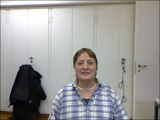

In [13]:
im.to_thumb(160)

In [19]:
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')

In [16]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [20]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)]
)

In [21]:
dls = biwi.dataloaders(path)

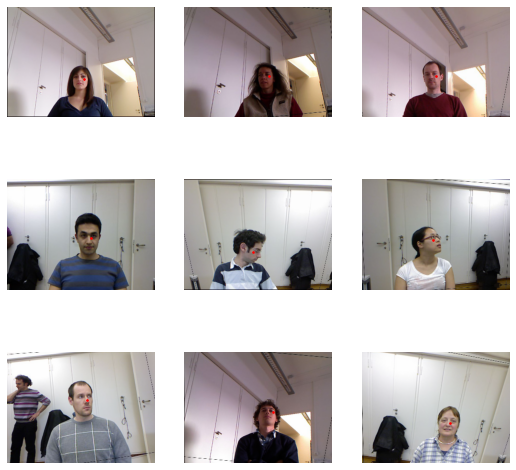

In [22]:
dls.show_batch()